In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-programming-languages-data/issues.csv
/kaggle/input/github-programming-languages-data/prs.csv
/kaggle/input/github-programming-languages-data/repos.csv


In [2]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt

## Importing issues files from dataset.

In [3]:
language=pd.read_csv('/kaggle/input/github-programming-languages-data/issues.csv')
language

,name,year,quarter,count
0,Ruby,2011,3,965
1,JavaScript,2011,3,694
2,Python,2011,3,619
3,PHP,2011,3,560
4,Java,2011,3,420
...,...,...,...,...
3370,Go,2022,1,204
3371,PHP,2022,1,173
3372,TypeScript,2022,1,169
3373,C,2022,1,151


## Checking for Null Values.

In [4]:
language.isnull().sum()

name       0
year       0
quarter    0
count      0
dtype: int64

##### It shows that, there's 0 null values.

In [5]:
language.columns

Index(['name', 'year', 'quarter', 'count'], dtype='object')

In [6]:
language.shape

(3375, 4)

### Counting the repeated data from given dataset.

In [7]:
language[language.duplicated()].count()

name       0
year       0
quarter    0
count      0
dtype: int64

# Representing data and sorting the data.

In [8]:
sort1 = language.sort_values('name',ascending=False)
sort1

,name,year,quarter,count
3212,xBase,2021,2,227
2976,xBase,2020,3,160
2719,xBase,2019,4,171
3074,xBase,2020,4,104
2552,xBase,2019,2,128
...,...,...,...,...
1760,1C Enterprise,2017,2,160
1640,1C Enterprise,2017,1,187
2374,1C Enterprise,2018,4,100
2282,1C Enterprise,2018,3,109


In [9]:
language.groupby('name')['count'].sum().nlargest(10)

name
JavaScript    6500226
Python        4192481
Java          3536070
PHP           2240585
C++           1941004
TypeScript    1741593
Go            1645358
C#            1407859
Ruby          1292627
C             1003056
Name: count, dtype: int64

## It shows that JavaScript is the most popular language and it is followed up by Python by securing the place of 2nd most popular lanaguage.

### Plotting the graph.

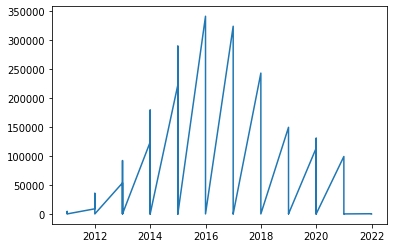

In [10]:
plt.plot(language['year'],language['count'])

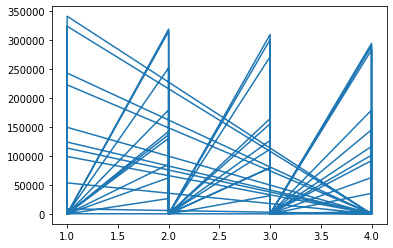

In [11]:
plt.plot(language['quarter'],language['count'])

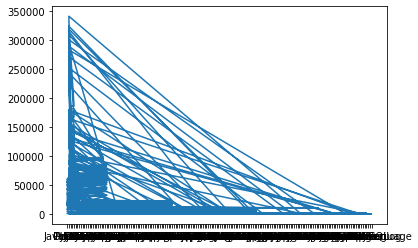

In [12]:
plt.plot(language['name'],language['count'])

#### Finding mean, count, Standard deviations and max values in the given dataset.

In [13]:
language.describe()

,year,quarter,count
count,3375.000000,3375.000000,3375.000000
mean,2016.833481,2.510222,9210.374815
std,2.574464,1.119345,28680.099075
min,2011.000000,1.000000,100.000000
25%,2015.000000,2.000000,222.500000
50%,2017.000000,3.000000,567.000000
75%,2019.000000,4.000000,2989.500000
max,2022.000000,4.000000,341480.000000


# Visualizing and loading prs.csv.

In [14]:
data=pd.read_csv('/kaggle/input/github-programming-languages-data/prs.csv')
data

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216
...,...,...,...,...
3457,C#,2022,1,187
3458,C,2022,1,152
3459,HTML,2022,1,134
3460,Scala,2022,1,110


In [15]:
data.isnull().sum()

name       0
year       0
quarter    0
count      0
dtype: int64

### Analysis

In [16]:
data.head()

,name,year,quarter,count
0,Ruby,2011,3,632
1,PHP,2011,3,484
2,Python,2011,3,423
3,JavaScript,2011,3,367
4,Java,2011,3,216


In [17]:
data.shape

(3462, 4)

In [18]:
data.columns

Index(['name', 'year', 'quarter', 'count'], dtype='object')

In [19]:
data.groupby('name')['count'].sum().nlargest(10)

name
JavaScript    7512246
Python        5904273
Java          3731712
Ruby          2887567
PHP           2474738
Go            2401902
C++           2145920
TypeScript    1994032
C#            1181788
HTML          1180280
Name: count, dtype: int64

In [20]:
data[data.duplicated()].count()

name       0
year       0
quarter    0
count      0
dtype: int64

# Graph plotting.

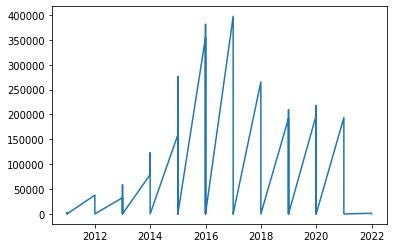

In [21]:
plt.plot(data['year'],data['count'])

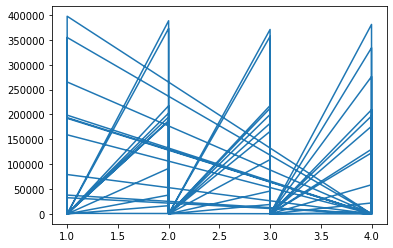

In [22]:
plt.plot(data['quarter'],data['count'])

In [23]:
data.groupby('year')['count'].sum().nlargest(10)

year
2017    6636621
2016    5987402
2020    5055278
2019    4637549
2018    4511395
2021    4144760
2015    4112878
2014    2048373
2013     952269
2012     430350
Name: count, dtype: int64

In [24]:
data.describe()

,year,quarter,count
count,3462.000000,3462.000000,3462.000000
mean,2017.013576,2.502022,11131.740901
std,2.552447,1.122835,34686.780996
min,2011.000000,1.000000,100.000000
25%,2015.000000,1.000000,230.000000
50%,2017.000000,2.000000,616.500000
75%,2019.000000,4.000000,3380.500000
max,2022.000000,4.000000,397530.000000


# Loading repos.csv.

In [25]:
repo=pd.read_csv('/kaggle/input/github-programming-languages-data/repos.csv')
repo

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870
...,...,...
448,Beef,1
449,Org,1
450,Q#,1
451,Motoko,1


In [26]:
repo.isnull().sum()

language     0
num_repos    0
dtype: int64

In [27]:
repo.columns

Index(['language', 'num_repos'], dtype='object')

In [28]:
repo.head()

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870


In [29]:
repo.describe()

,num_repos
count,4.530000e+02
mean,1.724180e+04
std,9.147605e+04
min,1.000000e+00
25%,3.700000e+01
50%,2.640000e+02
75%,2.563000e+03
max,1.100421e+06


# Visualizing.

In [30]:
repo.groupby('language')['num_repos'].sum().nlargest(10)

language
JavaScript    1100421
CSS            813443
HTML           779549
Shell          638068
Python         548870
Ruby           374802
Java           369282
PHP            339901
C              292000
C++            278066
Name: num_repos, dtype: int64

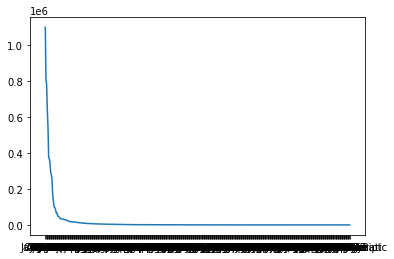

In [31]:
plt.plot(repo['language'],repo['num_repos'])

# Thank You.